In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from tqdm.notebook import tqdm
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import string
import missingno as msno
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [ ]:
true = pd.read_csv(r"D:\Ammar\Ai Diploma\projects\fake news detection\true.csv")
fake = pd.read_csv(r"D:\Ammar\Ai Diploma\projects\fake news detection\fake.csv")

In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
print("True news shape:", true.shape)
print("Fake news shape:", fake.shape)


True news shape: (21417, 4)
Fake news shape: (23481, 4)


In [6]:
print ("True news shape:", true.info())
print("-"*100)
print ("Fake news shape:", fake.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
True news shape: None
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
Fake news shape: None


In [7]:
print(true.duplicated().sum())
print(fake.duplicated().sum())
true.drop_duplicates(inplace=True)
fake.drop_duplicates(inplace=True)


206
3


In [ ]:
true['label'] = 0
fake['label'] = 1

df = pd.concat([fake, true], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.head()

,title,text,subject,date,label
0,Death of a blogger casts shadow over murky Malta,VALLETTA (Reuters) - Daphne Caruana Galizia po...,worldnews,"October 20, 2017",0
1,THIS Is How Far The Left Will Go To Protect Hi...,Jeffrey Toobin chimes in to protect Hillary Cl...,left-news,"Oct 23, 2015",1
2,'It's time to talk': EU again urges dialogue i...,STRASBOURG (Reuters) - The EU executive called...,worldnews,"October 4, 2017",0
3,Ex-Red Sox pitcher mulls run against Senator W...,BOSTON (Reuters) - Former Boston Red Sox pitch...,politicsNews,"October 18, 2016",0
4,Turkey's Erdogan says U.S. can no longer be a ...,ISTANBUL (Reuters) - Turkey s President Tayyip...,worldnews,"December 13, 2017",0


In [10]:
df['date'] = pd.to_datetime(df['date'],format='mixed', dayfirst=True,errors='coerce')

df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month_name()
df.head()

,title,text,subject,date,label,Year,Month
0,Death of a blogger casts shadow over murky Malta,VALLETTA (Reuters) - Daphne Caruana Galizia po...,worldnews,2017-10-20,0,2017.0,October
1,THIS Is How Far The Left Will Go To Protect Hi...,Jeffrey Toobin chimes in to protect Hillary Cl...,left-news,2015-10-23,1,2015.0,October
2,'It's time to talk': EU again urges dialogue i...,STRASBOURG (Reuters) - The EU executive called...,worldnews,2017-10-04,0,2017.0,October
3,Ex-Red Sox pitcher mulls run against Senator W...,BOSTON (Reuters) - Former Boston Red Sox pitch...,politicsNews,2016-10-18,0,2016.0,October
4,Turkey's Erdogan says U.S. can no longer be a ...,ISTANBUL (Reuters) - Turkey s President Tayyip...,worldnews,2017-12-13,0,2017.0,December


In [ ]:
df.columns = df.columns.str.replace('_', ' ').str.title()
df.head()

,Title,Text,Subject,Date,Label,Year,Month
0,Death of a blogger casts shadow over murky Malta,VALLETTA (Reuters) - Daphne Caruana Galizia po...,worldnews,2017-10-20,0,2017.0,October
1,THIS Is How Far The Left Will Go To Protect Hi...,Jeffrey Toobin chimes in to protect Hillary Cl...,left-news,2015-10-23,1,2015.0,October
2,'It's time to talk': EU again urges dialogue i...,STRASBOURG (Reuters) - The EU executive called...,worldnews,2017-10-04,0,2017.0,October
3,Ex-Red Sox pitcher mulls run against Senator W...,BOSTON (Reuters) - Former Boston Red Sox pitch...,politicsNews,2016-10-18,0,2016.0,October
4,Turkey's Erdogan says U.S. can no longer be a ...,ISTANBUL (Reuters) - Turkey s President Tayyip...,worldnews,2017-12-13,0,2017.0,December


In [12]:
stopwords = set(stopwords.words('english'))
stemmer = PorterStemmer()
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)
    text = re.sub(r'\d+', '', text)
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stopwords]
    return ' '.join(tokens)
df['Processed Text'] = df['Text'].apply(preprocess_text)
df["Processed Title"] = df["Title"].apply(preprocess_text)
df.head()

,Title,Text,Subject,Date,Label,Year,Month,Processed Text,Processed Title
0,Death of a blogger casts shadow over murky Malta,VALLETTA (Reuters) - Daphne Caruana Galizia po...,worldnews,2017-10-20,0,2017.0,October,valletta reuter daphn caruana galizia post two...,death blogger cast shadow murki malta
1,THIS Is How Far The Left Will Go To Protect Hi...,Jeffrey Toobin chimes in to protect Hillary Cl...,left-news,2015-10-23,1,2015.0,October,jeffrey toobin chime protect hillari clinton p...,far left go protect hillari clinton…sick
2,'It's time to talk': EU again urges dialogue i...,STRASBOURG (Reuters) - The EU executive called...,worldnews,2017-10-04,0,2017.0,October,strasbourg reuter eu execut call wednesday spa...,time talk eu urg dialogu spain
3,Ex-Red Sox pitcher mulls run against Senator W...,BOSTON (Reuters) - Former Boston Red Sox pitch...,politicsNews,2016-10-18,0,2016.0,October,boston reuter former boston red sox pitcher fa...,ex red sox pitcher mull run senat warren massa...
4,Turkey's Erdogan says U.S. can no longer be a ...,ISTANBUL (Reuters) - Turkey s President Tayyip...,worldnews,2017-12-13,0,2017.0,December,istanbul reuter turkey presid tayyip erdogan s...,turkey erdogan say u longer mediat israel pale...


In [13]:
df.drop(columns=[ 'Title', 'Text', 'Date'], inplace=True)


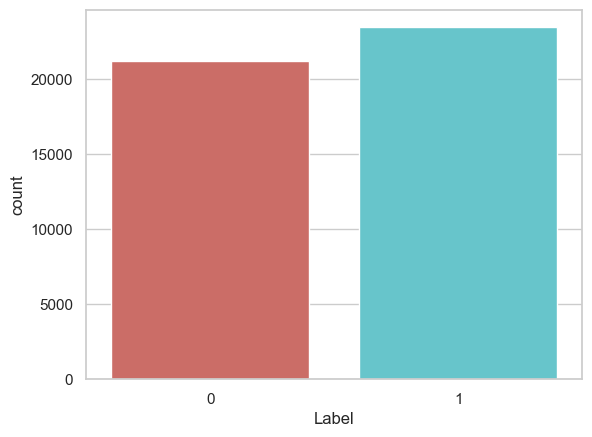

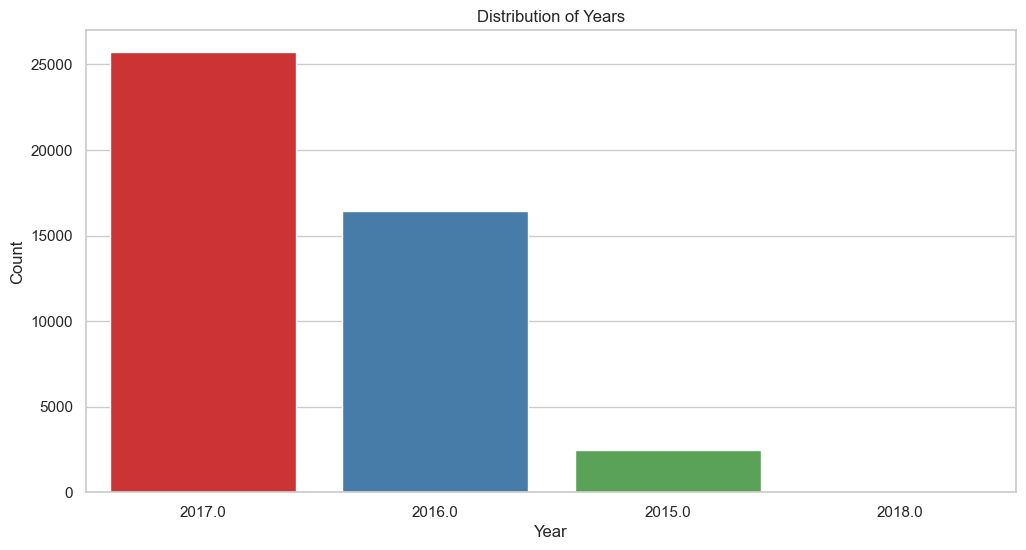

In [14]:
def create_distribution(dataFile):
    return sns.countplot(x='Label', data=dataFile, palette='hls')

create_distribution(df)

df['Label'].value_counts()

plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df, order=df['Year'].value_counts().index, palette='Set1')
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

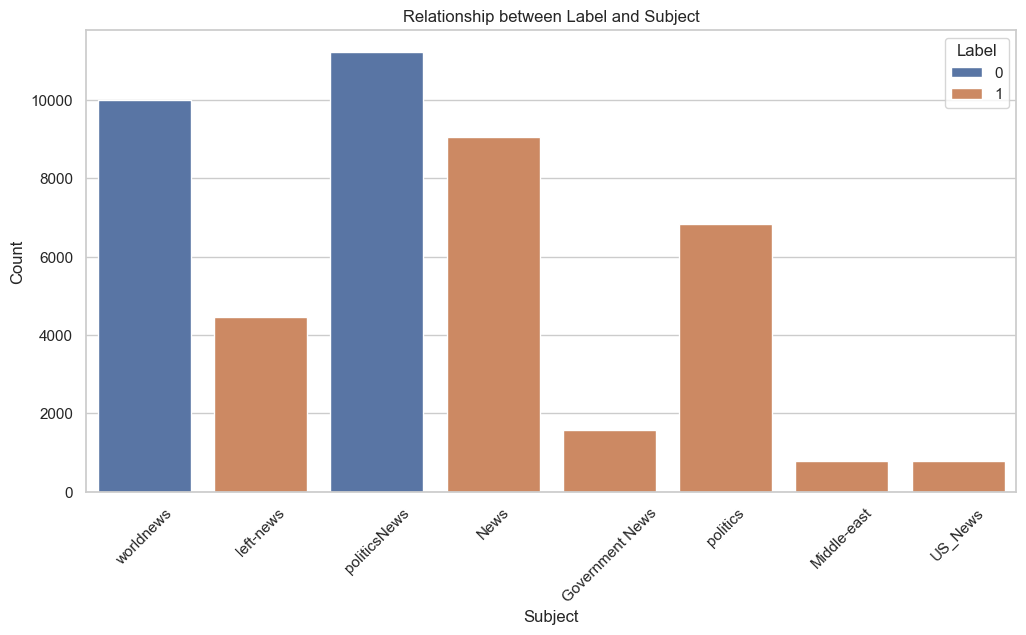

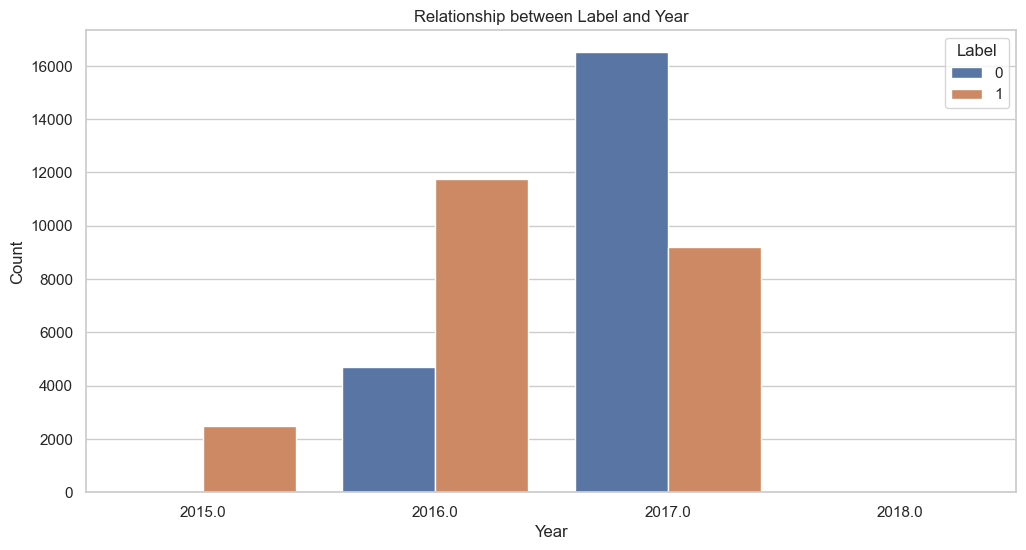

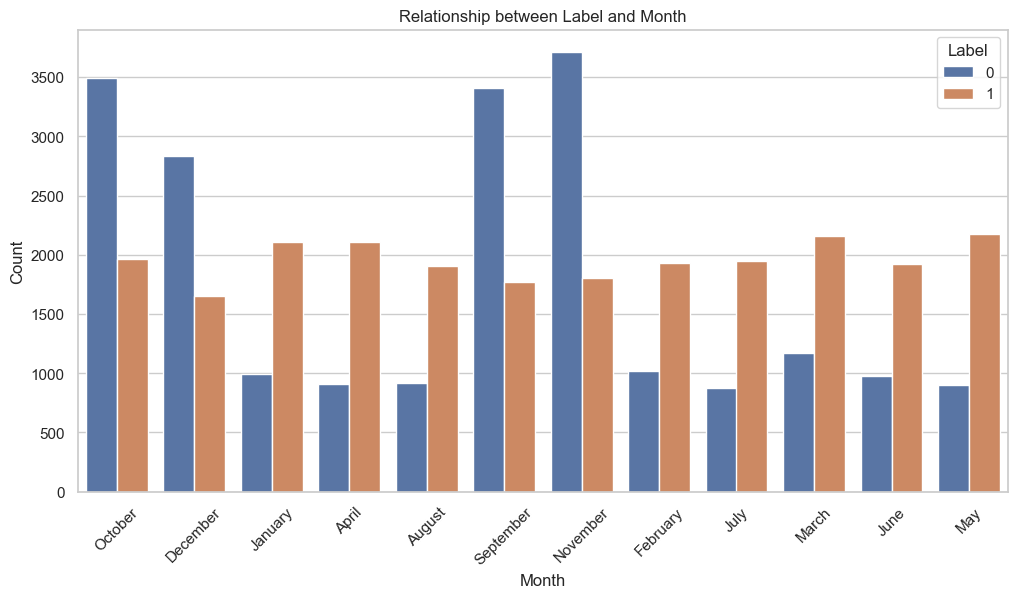

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Subject', hue='Label', data=df)
plt.title('Relationship between Label and Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Label', data=df)
plt.title('Relationship between Label and Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Label', data=df)
plt.title('Relationship between Label and Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

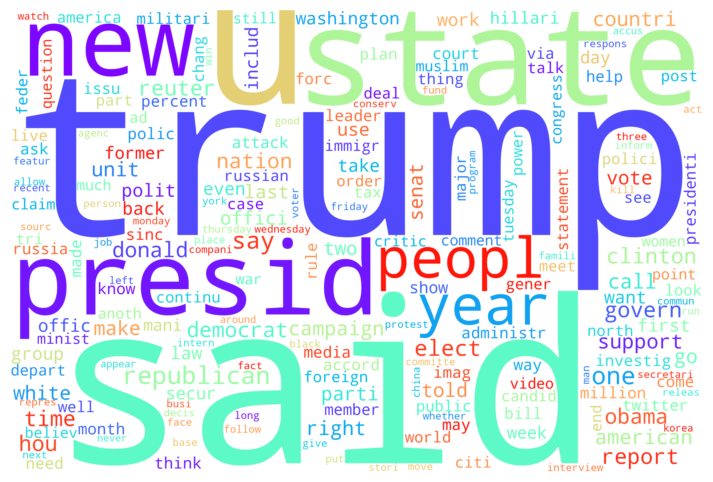

In [16]:
text = " ".join(df['Processed Text'].astype(str))

wordcloud = WordCloud(width=3000, height=2000, random_state=1, 
                      background_color='white', colormap='rainbow', collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

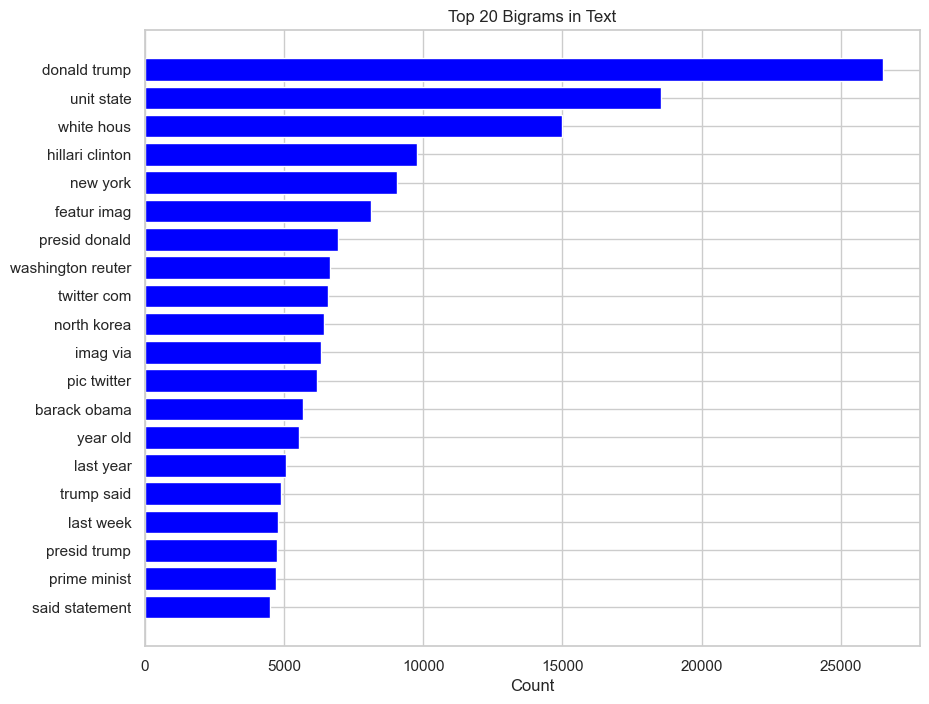

In [17]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_bigrams = get_top_n_bigram(df['Processed Text'], 20)

df_bigrams = pd.DataFrame(common_bigrams, columns=['bigram', 'count'])

plt.figure(figsize=(10, 8))
plt.barh(df_bigrams['bigram'], df_bigrams['count'], color='blue')
plt.xlabel('Count')
plt.title('Top 20 Bigrams in Text')
plt.gca().invert_yaxis()
plt.show()

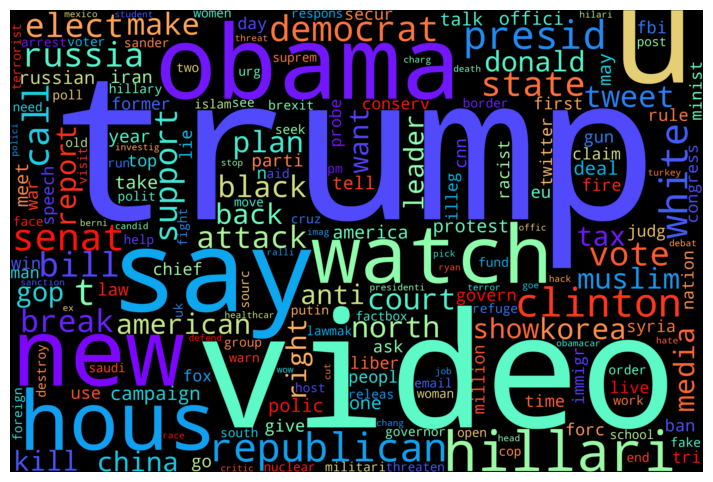

In [18]:
text = " ".join(df['Processed Title'].astype(str))

wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color='black', colormap='rainbow', collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

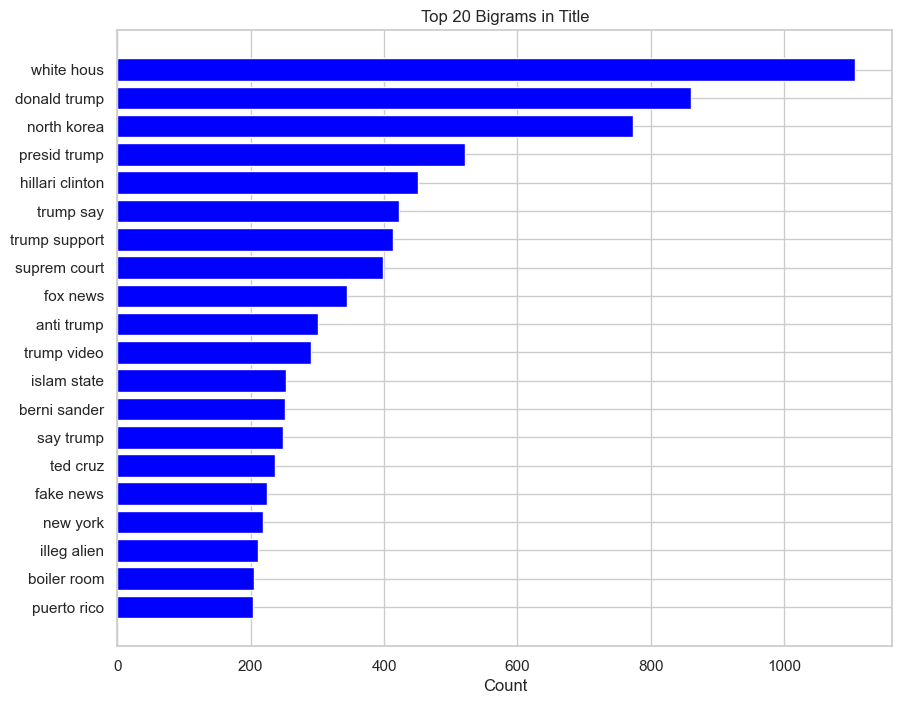

In [19]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_bigrams = get_top_n_bigram(df['Processed Title'], 20)

df_bigrams = pd.DataFrame(common_bigrams, columns=['bigram', 'count'])

plt.figure(figsize=(10, 8))
plt.barh(df_bigrams['bigram'], df_bigrams['count'], color='blue')
plt.xlabel('Count')
plt.title('Top 20 Bigrams in Title')
plt.gca().invert_yaxis()
plt.show()

<div style="background-color:rgb(0, 180, 204); color: white; padding: 10px; border-radius: 5px;">
    <p style="font-size: 16px; font-weight: bold;">
       5.Sentiment Analysis
    </p>
</div>


In [20]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

text = "I really love studying AI, but sometimes it gets very challenging."

print(sia.polarity_scores(text))


{'neg': 0.0, 'neu': 0.611, 'pos': 0.389, 'compound': 0.6232}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\IT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm  

sia = SentimentIntensityAnalyzer()
res = {}

for i, row in tqdm(df.iterrows(), total=len(df), desc="Sentiment Analysis"):
    text = row['Processed Text']
    my_id = row['Processed Title']
    res[my_id] = sia.polarity_scores(text)


Sentiment Analysis: 100%|██████████| 44689/44689 [01:22<00:00, 543.74it/s]


In [22]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Processed Title'})
vaders = vaders.merge(df, how='left')
vaders.head()

,Processed Title,neg,neu,pos,compound,Subject,Label,Year,Month,Processed Text
0,death blogger cast shadow murki malta,0.124,0.769,0.107,-0.8591,worldnews,0,2017.0,October,valletta reuter daphn caruana galizia post two...
1,far left go protect hillari clinton…sick,0.202,0.765,0.032,-0.9783,left-news,1,2015.0,October,jeffrey toobin chime protect hillari clinton p...
2,far left go protect hillari clinton…sick,0.202,0.765,0.032,-0.9783,Government News,1,2015.0,October,jeffrey toobin chime protect hillari clinton p...
3,far left go protect hillari clinton…sick,0.202,0.765,0.032,-0.9783,politics,1,2015.0,October,jeffrey toobin chime protect hillari clinton p...
4,time talk eu urg dialogu spain,0.102,0.849,0.049,-0.9648,worldnews,0,2017.0,October,strasbourg reuter eu execut call wednesday spa...


In [23]:
def polarity_score(compound):
    if compound > 0.05:
        return "positive"
    elif compound < -0.5:
        return "negative"
    else:
        return "neutral"

vaders['sentiment'] = vaders['compound'].apply(lambda val: polarity_score(val))
vaders['sentiment'].value_counts()

sentiment
positive    20074
negative    18833
neutral      5782
Name: count, dtype: int64

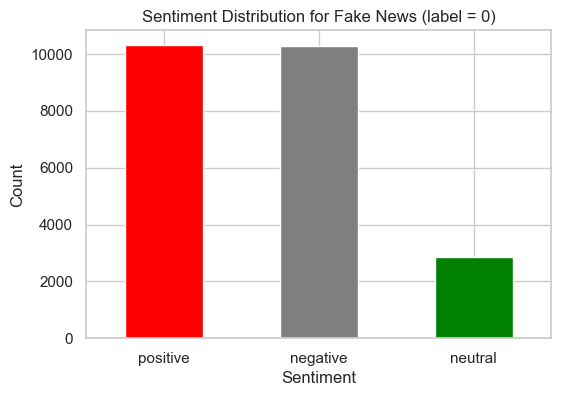

In [24]:
fake_news = vaders[vaders['Label'] == 1]

sentiment_counts = fake_news['sentiment'].value_counts()

plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color=['red', 'gray', 'green'])
plt.title("Sentiment Distribution for Fake News (label = 0)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


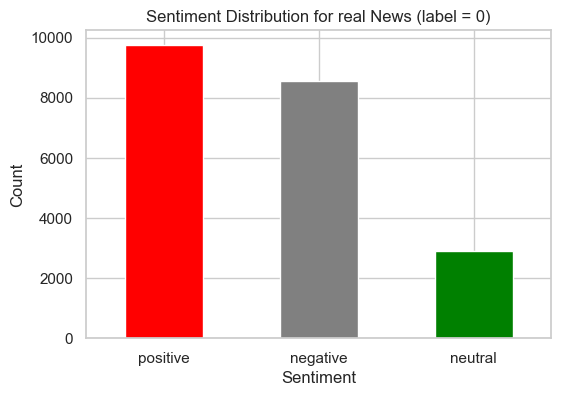

In [25]:
fake_news = vaders[vaders['Label'] == 0]

sentiment_counts = fake_news['sentiment'].value_counts()

plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color=['red', 'gray', 'green'])
plt.title("Sentiment Distribution for real News (label = 0)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


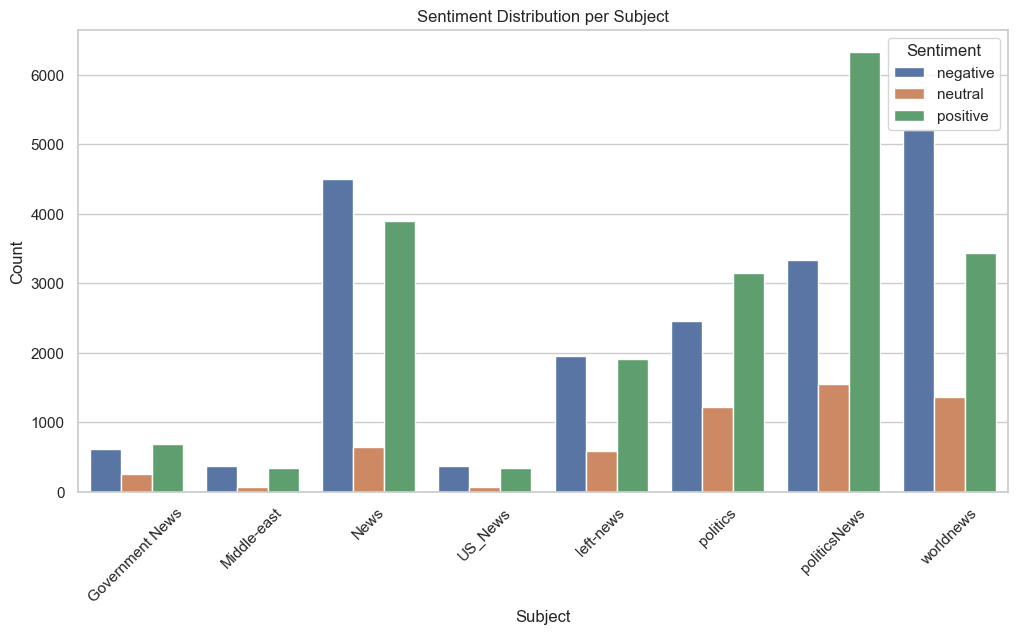

In [26]:
sentiment_counts = vaders.groupby(['Subject', 'sentiment'])['sentiment'].count().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(x='Subject', y='count', hue='sentiment', data=sentiment_counts)

plt.title('Sentiment Distribution per Subject')
plt.xlabel('Subject')
plt.ylabel('Count')

plt.legend(title='Sentiment')

plt.xticks(rotation=45)

plt.show()


In [27]:
vaders.head()

,Processed Title,neg,neu,pos,compound,Subject,Label,Year,Month,Processed Text,sentiment
0,death blogger cast shadow murki malta,0.124,0.769,0.107,-0.8591,worldnews,0,2017.0,October,valletta reuter daphn caruana galizia post two...,negative
1,far left go protect hillari clinton…sick,0.202,0.765,0.032,-0.9783,left-news,1,2015.0,October,jeffrey toobin chime protect hillari clinton p...,negative
2,far left go protect hillari clinton…sick,0.202,0.765,0.032,-0.9783,Government News,1,2015.0,October,jeffrey toobin chime protect hillari clinton p...,negative
3,far left go protect hillari clinton…sick,0.202,0.765,0.032,-0.9783,politics,1,2015.0,October,jeffrey toobin chime protect hillari clinton p...,negative
4,time talk eu urg dialogu spain,0.102,0.849,0.049,-0.9648,worldnews,0,2017.0,October,strasbourg reuter eu execut call wednesday spa...,negative


<div style="background-color:rgb(0, 180, 204); color: white; padding: 10px; border-radius: 5px;">
    <p style="font-size: 16px; font-weight: bold;">
       6.Preprocesing
</div>


In [28]:
from imblearn.over_sampling import RandomOverSampler
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

In [29]:
df1 = vaders.copy()
df1['content'] = df1['Processed Title'] + ' ' + df1['Processed Text']


In [30]:
X = df1['content']
y = df1['Label']


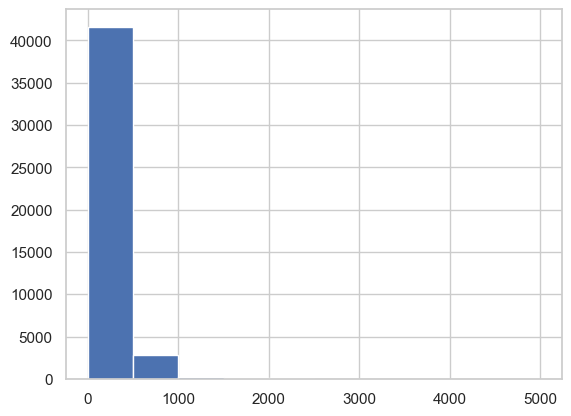

In [31]:
text_lengths = X.apply(lambda x: len(x.split(" ")))
plt.hist(text_lengths)
plt.show()

<div style="background-color:rgb(0, 180, 204); color: white; padding: 10px; border-radius: 5px;">
    <p style="font-size: 16px; font-weight: bold;">
       7.Model RNN
</div>


In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
import pickle

# ================== البيانات ==================
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(df1['content'].values.reshape(-1, 1), df1['Label'])
X_res = X_res.flatten()

# ================== Tokenizer ==================
tokenizer = Tokenizer(num_words=50000, oov_token='OOV')
tokenizer.fit_on_texts(X_res)
sequences = tokenizer.texts_to_sequences(X_res)
padded = pad_sequences(sequences, maxlen=1000)

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    padded, y_res, test_size=0.2, random_state=42
)

# ================== بناء الموديل ==================
model = Sequential()

# طبقة Embedding
model.add(Embedding(input_dim=50000, output_dim=32, input_length=1000))

# استبدال RNN بـ LSTM (أفضل للـ long dependencies)
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=False))

# طبقة Dense وسيطة
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# طبقة المخرجات
model.add(Dense(1, activation='sigmoid'))

# ================== Compile ==================
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

model.summary()

# ================== Early Stopping ==================
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# ================== Training ==================
history = model.fit(
    X_train, y_train,
    epochs=4,
    validation_data=(X_test, y_test),
    batch_size=32,
    callbacks=[early_stopping]
)




Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 677s 574ms/step - accuracy: 0.9660 - auc: 0.9927 - loss: 0.1010 - val_accuracy: 0.9801 - val_auc: 0.9964 - val_loss: 0.0663
Epoch 2/4
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 677s 574ms/step - accuracy: 0.9660 - auc: 0.9927 - loss: 0.1010 - val_accuracy: 0.9801 - val_auc: 0.9964 - val_loss: 0.0663
Epoch 2/4
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 666s 567ms/step - accuracy: 0.9876 - auc: 0.9981 - loss: 0.0398 - val_accuracy: 0.9892 - val_auc: 0.9975 - val_loss: 0.0386
Epoch 3/4
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 666s 567ms/step - accuracy: 0.9876 - auc: 0.9981 - loss: 0.0398 - val_accuracy: 0.9892 - val_auc: 0.9975 - val_loss: 0.0386
Epoch 3/4
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 655s 558ms/step - accuracy: 0.9925 - auc: 0.9987 - loss: 0.0259 - val_accuracy: 0.9905 - val_auc: 0.9979 - val_loss: 0.0375
Epoch 4/4
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 655s 558ms/step - accuracy: 0.9925 - auc: 0.9987 - loss: 0.0259 - val_accuracy: 0.9905 - val_auc: 0.9979 - val_loss: 0.0375
Epoch 4/4


In [43]:
loss, acc, auc = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Test AUC: {auc:.4f}")


294/294 ━━━━━━━━━━━━━━━━━━━━ 33s 114ms/step - accuracy: 0.9905 - auc: 0.9979 - loss: 0.0375
Test Loss: 0.0375
Test Accuracy: 0.9905
Test AUC: 0.9979
294/294 ━━━━━━━━━━━━━━━━━━━━ 33s 114ms/step - accuracy: 0.9905 - auc: 0.9979 - loss: 0.0375
Test Loss: 0.0375
Test Accuracy: 0.9905
Test AUC: 0.9979


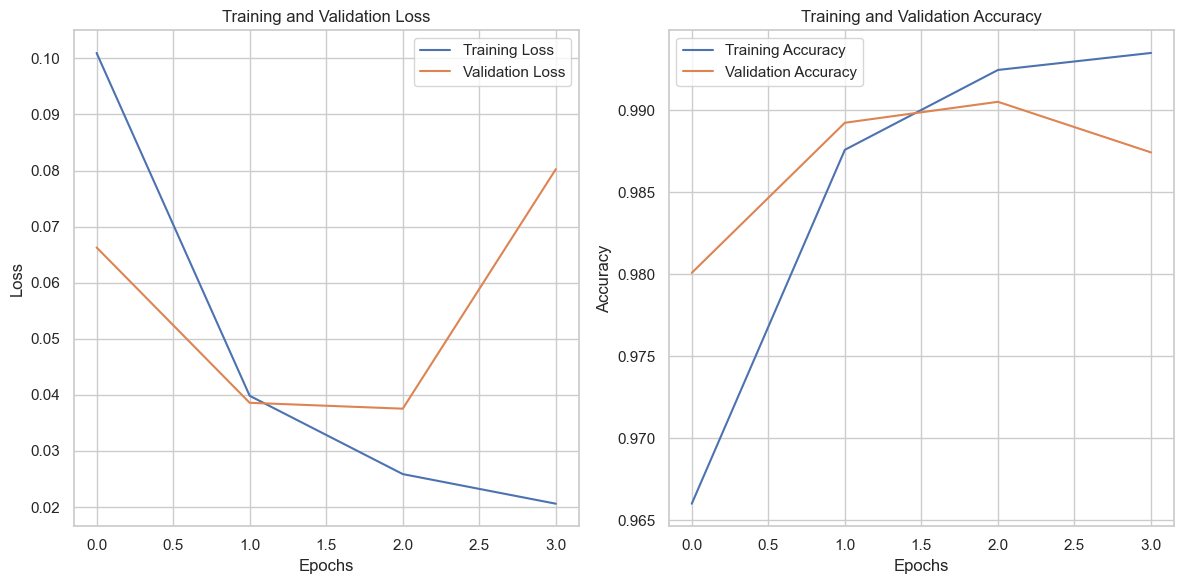

In [44]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

294/294 ━━━━━━━━━━━━━━━━━━━━ 34s 116ms/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 34s 116ms/step


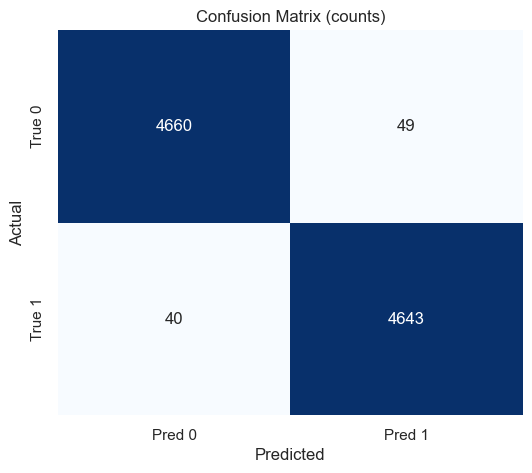

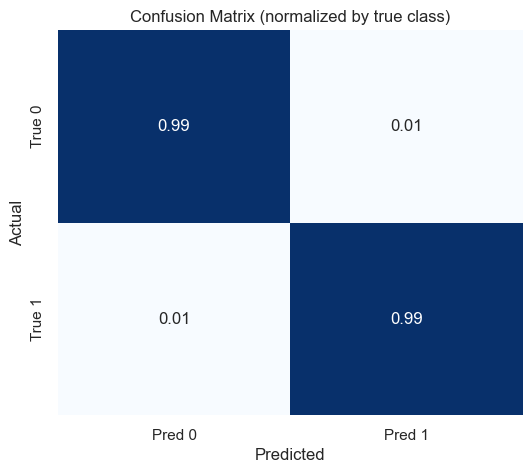

Classification Report:

              precision    recall  f1-score   support

        real       0.99      0.99      0.99      4709
        fake       0.99      0.99      0.99      4683

    accuracy                           0.99      9392
   macro avg       0.99      0.99      0.99      9392
weighted avg       0.99      0.99      0.99      9392



In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

y_prob = model.predict(X_test)
y_prob = np.squeeze(y_prob)
y_pred = (y_prob >= 0.5).astype(int)

labels = [0, 1]
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (counts)')
plt.show()

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(6,5))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (normalized by true class)')
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['real', 'fake']))


In [ ]:


# ================== حفظ الموديل والتوكنيزر ==================
model.save("rnn_lstm_model.h5")
print("✅ Model saved as rnn_model.h5")
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
print("✅ Tokenizer saved as tokenizer.pkl")


✅ Model saved as rnn_model.h5
✅ Tokenizer saved as tokenizer.pkl


In [ ]:
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)
print("✅ Tokenizer loaded successfully")

from keras.models import load_model

model = load_model("rnn_model.h5")
print("✅ Model loaded successfully")

seq = tokenizer.texts_to_sequences(["A major tech company announced a new smartphone that can fully charge from 0% to 100% in just one minute without any electricity source, using air power technology, and it will be available in the market next month for only $50"])
padded = pad_sequences(seq, maxlen=1000)

prediction = model.predict(padded)
print("Predicted probability:", prediction[0][0])

label = 1 if prediction[0][0] >= 0.5 else 0
print("Predicted class:", label)


✅ Tokenizer loaded successfully
✅ Model loaded successfully
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Predicted probability: 0.5661371
Predicted class: 1
